In [160]:
import pandas as pd
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as scorer
import string
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Embedding,LSTM,TimeDistributed,Dense,Dropout,Bidirectional

In [156]:
import matplotlib.pyplot as plt

In [120]:
data=pd.read_csv("training_data.tsv",delimiter='\t',header=None)
data.head(100)

,0,1
0,Make remainder,Not Found
1,Set a reminder on date 23rd November'2016,Not Found
2,I need a daily wake up call,wake up call
3,remind me 6 pm today eveng,Not Found
4,Hi Pls to make one reminder for me,Not Found
5,Remind me at 28 December for recharge,recharge
6,Can u help me with reminder..,Not Found
7,Can u pls remind me at 7pm on 8 Jan,on 8 Jan
8,What is my next reminder?,What
9,Can u please set me an alarm at 7.30 am,Not Found


In [121]:
print(data.shape)

(9819, 2)


In [122]:
text=list(data[0])
print(text[:10])

['Make remainder', "Set a reminder on date 23rd November'2016", 'I need a daily wake up call', 'remind me 6 pm today eveng', 'Hi Pls to make one reminder for me', 'Remind me at 28 December for recharge', 'Can u help me with reminder..', 'Can u pls remind me at 7pm on 8 Jan', 'What is my next reminder?', 'Can u please set me an alarm at 7.30 am']


In [123]:
for i in range(len(text)):
    text[i]=re.sub('[^ A-Za-z0-9]+', ' ', str(text[i]))
print(text[:100])

['Make remainder', 'Set a reminder on date 23rd November 2016', 'I need a daily wake up call', 'remind me 6 pm today eveng', 'Hi Pls to make one reminder for me', 'Remind me at 28 December for recharge', 'Can u help me with reminder ', 'Can u pls remind me at 7pm on 8 Jan', 'What is my next reminder ', 'Can u please set me an alarm at 7 30 am', 'Set a reminder on 4 th Dec of going to meet sonal miss at 2 00 pm', 'Remind me to purchase shoe polish liquid Date 3 Jan Time 6 30 pm', 'Thanks at least I ll remember my loves birthday this time', 'I setd a reminder but it dint remained me', 'Susan dmello meeting with sujit sir remind him Tomorrow', 'I need to set reminder to msg babbu at 7 in evening', 'Hi give me a reminder to pay LIC Premium on tonight 9 PM', '3 alarms 7 15 am 7 30 am 7 45 am', 'Daily', 'Remind me to go to bank at 11 am today', 'Remind me to buy eggs on next Monday and Tuesday at 9pm', 'Please remind me for internal audit review meeting at 12 45 today', 'One more reminder I 

In [124]:
all_text=" ".join(text)

In [125]:
print(text[:5])
label=list(data[1])
print(label[:5])

['Make remainder', 'Set a reminder on date 23rd November 2016', 'I need a daily wake up call', 'remind me 6 pm today eveng', 'Hi Pls to make one reminder for me']
['Not Found', 'Not Found', 'wake up call', 'Not Found', 'Not Found']


In [138]:
all_Y=[]
for i in range(len(label)):
    Y=["0"]*len(text[i].split())    
    if label[i]!="Not Found":
        temp=""
        temp=temp+text[i]
        temp=temp.replace(label[i]," ".join(["Output"]*len(label[i].split())))
        Y=["0" if j!='Output' else "Output" for j in temp.split() ]
    all_Y.append(Y)
print(all_Y[:10])
all_X=[j.split() for j in text]
print(all_X[:10])

[['0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', 'Output', 'Output', 'Output'], ['0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', 'Output'], ['0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', 'Output', 'Output', 'Output'], ['Output', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']]
[['Make', 'remainder'], ['Set', 'a', 'reminder', 'on', 'date', '23rd', 'November', '2016'], ['I', 'need', 'a', 'daily', 'wake', 'up', 'call'], ['remind', 'me', '6', 'pm', 'today', 'eveng'], ['Hi', 'Pls', 'to', 'make', 'one', 'reminder', 'for', 'me'], ['Remind', 'me', 'at', '28', 'December', 'for', 'recharge'], ['Can', 'u', 'help', 'me', 'with', 'reminder'], ['Can', 'u', 'pls', 'remind', 'me', 'at', '7pm', 'on', '8', 'Jan'], ['What', 'is', 'my', 'next', 'reminder'], ['Can', 'u', 'please', 'set', 'me', 'an', 'alarm', 'at', '7', '30', 'am']]


In [139]:
all_X=[[i.lower() for i in a]for a in all_X]
all_X=[[int("1"*len(str(i))) if i.isdigit() else i for i in a]for a in all_X]
print(all_X[:5])

[['make', 'remainder'], ['set', 'a', 'reminder', 'on', 'date', '23rd', 'november', 1111], ['i', 'need', 'a', 'daily', 'wake', 'up', 'call'], ['remind', 'me', 1, 'pm', 'today', 'eveng'], ['hi', 'pls', 'to', 'make', 'one', 'reminder', 'for', 'me']]


In [140]:
all_words=[b for a in all_X for b in a]
print(all_words[:10])
print(len(all_words))
all_words=list(set(all_words))
print(len(all_words))

['make', 'remainder', 'set', 'a', 'reminder', 'on', 'date', '23rd', 'november', 1111]
84941
6149


In [141]:
words = list(set(all_words))
word2ind = {word: index for index, word in enumerate(words)}

In [213]:
X_data = [[word2ind[c] for c in x] for x in all_X]
print(X_data[:5])

[[5668, 5075], [2802, 4748, 5325, 23, 2974, 3560, 1467, 216], [3478, 3315, 4748, 4272, 5632, 4209, 2506], [1741, 472, 0, 5221, 145, 6089], [1275, 5725, 5840, 5668, 5993, 5325, 689, 472]]


In [214]:
max_length=0
for i in X_data:
    max_length=max(max_length,len(i))
print(max_length)
labels=["0",'Output']
label2ind = {label: (index) for index, label in enumerate(labels)}
ind2label = {(index): label for index, label in enumerate(labels)}
max_label=max(label2ind.values())+1
Y_data = [ [label2ind[c] for c in ey] for ey in all_Y]

Y_label=[np_utils.to_categorical(i,max_label) for i in Y_data ]

69


In [215]:
X_data = pad_sequences(X_data, maxlen=max_length,padding='post')
Y_label = pad_sequences(Y_label, maxlen=max_length,padding='post')

In [216]:
print(X_data[:5])
print(Y_label[:5])

[[5668 5075    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [2802 4748 5325   23 2974 3560 1467  216    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [3478 3315 4748 4272 5632 4209 2506    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0


In [217]:
embedding_size=256
max_features = len(word2ind)
out_size=2
batch_size=32
epoch=2
amount=int(0.7*len(X_data))
X_train=X_data[:amount]
Y_train=Y_label[:amount]
X_test=X_data[amount:]
Y_test=Y_label[amount:]

In [223]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_size,input_length=max_length, mask_zero=False))
model.add(Bidirectional(LSTM(256,return_sequences=True,stateful=False)))
model.add(Dropout(0.3))
model.add(TimeDistributed(Dense(2,activation='softmax')))
print(model.summary())


model.compile(loss='categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])


history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Raw test score:', score)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 69, 256)           1574400   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 69, 512)           1050624   
_________________________________________________________________
dropout_11 (Dropout)         (None, 69, 512)           0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 69, 2)             1026      
Total params: 2,626,050
Trainable params: 2,626,050
Non-trainable params: 0
_________________________________________________________________
None
Train on 6873 samples, validate on 2946 samples
Epoch 1/2
6873/6873 [==============================] - 226s - loss: 0.0378 - acc: 0.9819 - val_loss: 0.0322 - val_acc: 0.9872
Epoch 2/2
2944/2946 [============================>.] - ETA: 0sRaw test score: [0.0278

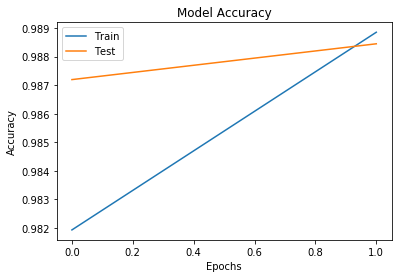

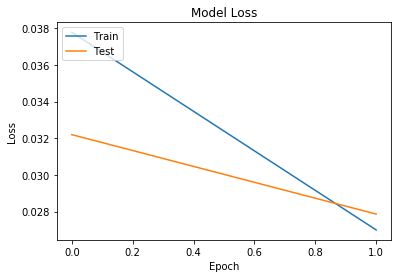

In [224]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [225]:
predicted_train = model.predict_classes(X_train)
actual_train = Y_train.argmax(2)
actual_train=[a for b in actual_train for a in b]
predicted_train=[a for b in predicted_train for a in b]
print('\n Training confusion matrix:')
print(confusion_matrix(actual_train, predicted_train))
precision, recall, fscore,support= scorer(actual_train, predicted_train)
print('\n',labels)
print('Precision:   ',[float(a) for a in precision])
print('Recall   :   ',[float(a) for a in recall])
print('F-score  :   ',[float(a) for a in fscore])

6873/6873 [==============================] - 63s    

 Training confusion matrix:
[[460060   1853]
 [  2321  10003]]

 ['0', 'Output']
Precision:    [0.9949803300741163, 0.8437078272604588]
Recall   :    [0.9959884220621632, 0.8116682895163908]
F-score  :    [0.9954841208533215, 0.8273779983457403]


In [226]:
#Testing Metrics
predicted_test1=model.predict_classes(X_test)
actual_test1 = Y_test.argmax(2)
actual_test=[a for b in actual_test1 for a in b]
predicted_test=[a for b in predicted_test1 for a in b]
print('\n Testing confusion matrix:')
print(confusion_matrix(actual_test, predicted_test))
precision, recall, fscore,support= scorer(actual_test, predicted_test)
print('\n',labels)
print('Precision:   ',[float(a) for a in precision])
print('Recall   :   ',[float(a) for a in recall])
print('F-score  :   ',[float(a) for a in fscore])

2944/2946 [============================>.] - ETA: 0s
 Testing confusion matrix:
[[196743   1087]
 [  1261   4183]]

 ['0', 'Output']
Precision:    [0.9936314417890547, 0.7937381404174573]
Recall   :    [0.9945053834099985, 0.7683688464364438]
F-score  :    [0.9940682205166812, 0.7808474892663804]


In [227]:
print(predicted_test1[:2])
print(actual_test1[:2])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [255]:
data_test=pd.read_csv("eval_data.txt",delimiter='\t',header=None)
print(data_test)

                                                     0
0    Reminder for daily reporting and attendance on...
1                   How will you remind me let me know
2                              Can u remind me till 11
3                               Call at 9 am every day
4    Remind me to bid for flights on 13th december ...
5            Reminder 11am tomorrorw buy bell for papu
6         Remind me to book b tickets tonight by 10 pm
7                      Can you remind me to masturbate
8                      Reminder on invoice preparation
9     1 alarm at 1 30am please. Ignore the 12 20am one
10   One more reminder....2:00 pm ...today for meeting
11                                 call sagar @5:30 pm
12                    I'm upset vth d reminder service
13                    Remind me to see. Concert at 7pm
14                  Remind me again after half an hour
15        Need a reminder for payment and phone at 2pm
16   Remind me tomorrow 11 am to pack gift for my c...
17   Remin

In [256]:
text_test=list(data_test[0])

In [257]:
for i in range(len(text_test)):
    text_test[i]=re.sub('[^ A-Za-z0-9]+', ' ', str(text_test[i]))
print(text_test[:100])

['Reminder for daily reporting and attendance on mob app daily 9 00 am', 'How will you remind me let me know', 'Can u remind me till 11', 'Call at 9 am every day', 'Remind me to bid for flights on 13th december at 6 pm', 'Reminder 11am tomorrorw buy bell for papu', 'Remind me to book b tickets tonight by 10 pm', 'Can you remind me to masturbate', 'Reminder on invoice preparation', '1 alarm at 1 30am please  Ignore the 12 20am one', 'One more reminder 2 00 pm  today for meeting', 'call sagar  5 30 pm', 'I m upset vth d reminder service', 'Remind me to see  Concert at 7pm', 'Remind me again after half an hour', 'Need a reminder for payment and phone at 2pm', 'Remind me tomorrow 11 am to pack gift for my college sir ', 'Remind me on 1st dec to take appointment of those 2 customer at sanaswadi', 'Remind me to play football at 10 5', 'Weke up alarm I need morning', 'Would you remind me to print the log sheet out today', 'Cud u pls set up a recuring reminder', 'Hey thanks for ur reminder', '

In [273]:
all_X_test=[j.split() for j in text_test]
all_X_test_2=all_X_test[:]
print(all_X_test[:10])
all_X_test=[[i.lower() for i in a]for a in all_X_test]
all_X_test=[[int("1"*len(str(i))) if i.isdigit() else i for i in a]for a in all_X_test]
print(all_X_test[:5])

[['Reminder', 'for', 'daily', 'reporting', 'and', 'attendance', 'on', 'mob', 'app', 'daily', '9', '00', 'am'], ['How', 'will', 'you', 'remind', 'me', 'let', 'me', 'know'], ['Can', 'u', 'remind', 'me', 'till', '11'], ['Call', 'at', '9', 'am', 'every', 'day'], ['Remind', 'me', 'to', 'bid', 'for', 'flights', 'on', '13th', 'december', 'at', '6', 'pm'], ['Reminder', '11am', 'tomorrorw', 'buy', 'bell', 'for', 'papu'], ['Remind', 'me', 'to', 'book', 'b', 'tickets', 'tonight', 'by', '10', 'pm'], ['Can', 'you', 'remind', 'me', 'to', 'masturbate'], ['Reminder', 'on', 'invoice', 'preparation'], ['1', 'alarm', 'at', '1', '30am', 'please', 'Ignore', 'the', '12', '20am', 'one']]
[['reminder', 'for', 'daily', 'reporting', 'and', 'attendance', 'on', 'mob', 'app', 'daily', 1, 11, 'am'], ['how', 'will', 'you', 'remind', 'me', 'let', 'me', 'know'], ['can', 'u', 'remind', 'me', 'till', 11], ['call', 'at', 1, 'am', 'every', 'day'], ['remind', 'me', 'to', 'bid', 'for', 'flights', 'on', '13th', 'december', '

In [259]:
X=[[str(i).lower() for i in a]for a in all_X_test]
X=[[int("1"*len(str(i))) if str(i).isdigit() else i for i in a]for a in X]
print(X)

[['reminder', 'for', 'daily', 'reporting', 'and', 'attendance', 'on', 'mob', 'app', 'daily', 1, 11, 'am'], ['how', 'will', 'you', 'remind', 'me', 'let', 'me', 'know'], ['can', 'u', 'remind', 'me', 'till', 11], ['call', 'at', 1, 'am', 'every', 'day'], ['remind', 'me', 'to', 'bid', 'for', 'flights', 'on', '13th', 'december', 'at', 1, 'pm'], ['reminder', '11am', 'tomorrorw', 'buy', 'bell', 'for', 'papu'], ['remind', 'me', 'to', 'book', 'b', 'tickets', 'tonight', 'by', 11, 'pm'], ['can', 'you', 'remind', 'me', 'to', 'masturbate'], ['reminder', 'on', 'invoice', 'preparation'], [1, 'alarm', 'at', 1, '30am', 'please', 'ignore', 'the', 11, '20am', 'one'], ['one', 'more', 'reminder', 1, 11, 'pm', 'today', 'for', 'meeting'], ['call', 'sagar', 1, 11, 'pm'], ['i', 'm', 'upset', 'vth', 'd', 'reminder', 'service'], ['remind', 'me', 'to', 'see', 'concert', 'at', '7pm'], ['remind', 'me', 'again', 'after', 'half', 'an', 'hour'], ['need', 'a', 'reminder', 'for', 'payment', 'and', 'phone', 'at', '2pm'], 

In [260]:
word2ind["UNK"]=len(all_words)
X_test = [[word2ind[c] if c in word2ind else word2ind["UNK"] for c in x] for x in X]
X_test = pad_sequences(X_test, maxlen=max_length,padding='post')

print(X_test[:5])

[[5325  689 4272 4844 4298 1385   23 4764 2307 4272    0    5 3013    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [2404 2270 5654 1741  472  667  472 5723    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [1545 6056 1741  472 1539    5    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0


In [261]:
predicted_test = model.predict_classes(X_test)

500/500 [==============================] - 4s     


In [262]:
print(predicted_test[:5])

[[0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [266]:
ind2word={index: word for index, word in enumerate(words)}
ind2word[6149]="UNK"

In [277]:
result=[]
for i in range(len(predicted_test)):
    if set(predicted_test[i])=={0}:
        result.append("Not Found")
    else:
        temp=""
        for j in range(len(predicted_test[i])):
            if predicted_test[i][j]==1:
                temp=(temp+" "+str(ind2word[X_test[i][j]])) if str(ind2word[X_test[i][j]])!='UNK' else temp+" "+all_X_test_2[i][j]
        result.append(temp)

In [278]:
data_result={
    "Word":text_test,
    "Phrase":result
}
print(len(text_test))
print(len(result))
print(text_test[:5])
print(result[:5])

500
500
['Reminder for daily reporting and attendance on mob app daily 9 00 am', 'How will you remind me let me know', 'Can u remind me till 11', 'Call at 9 am every day', 'Remind me to bid for flights on 13th december at 6 pm']
[' reporting and attendance on mob app', 'Not Found', 'Not Found', ' call', ' bid for flights']


In [279]:
data_result=pd.DataFrame(data_result,columns=['Word','Phrase'])
data_result.to_csv("Result.csv")